In [56]:
%matplotlib inline

import numpy as np
import scipy
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import pylab
from sklearn.decomposition import PCA
from sklearn.utils import shuffle

from scipy.ndimage import gaussian_filter,maximum_filter

import skimage.measure


plt.style.use('ggplot')

In [3]:
feature_label = np.load('../data/tag_name.npy')
train_X = np.load('../data/train_X.npy')
train_binary_Y = np.load('../data/train_binary_Y.npy')
valid_test_X = np.load('../data/valid_test_X.npy')

In [4]:
print(feature_label)
print("feature_label shape: " + str(feature_label.shape))
print("train_X shape: " + str(train_X.shape))
print("train_binary_Y shape: " + str(train_binary_Y.shape))
print("valid_test_X shape: " + str(valid_test_X.shape))

['faces' 'left_foot' 'visual_digits' 'left_hand' 'calculation' 'language'
 'horizontal_checkerboard' 'human_sound' 'vertical_checkerboard' 'objects'
 'places' 'scramble' 'right_hand' 'right_foot' 'visual_words' 'visual'
 'non_human_sound' 'auditory' 'saccades']
feature_label shape: (19,)
train_X shape: (4602, 26, 31, 23)
train_binary_Y shape: (4602, 19)
valid_test_X shape: (1971, 26, 31, 23)


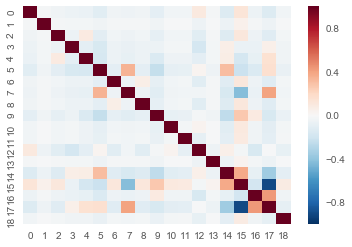

In [169]:
import pandas as pd
import seaborn as sns

df = pd.DataFrame(train_binary_Y)
corr = df.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

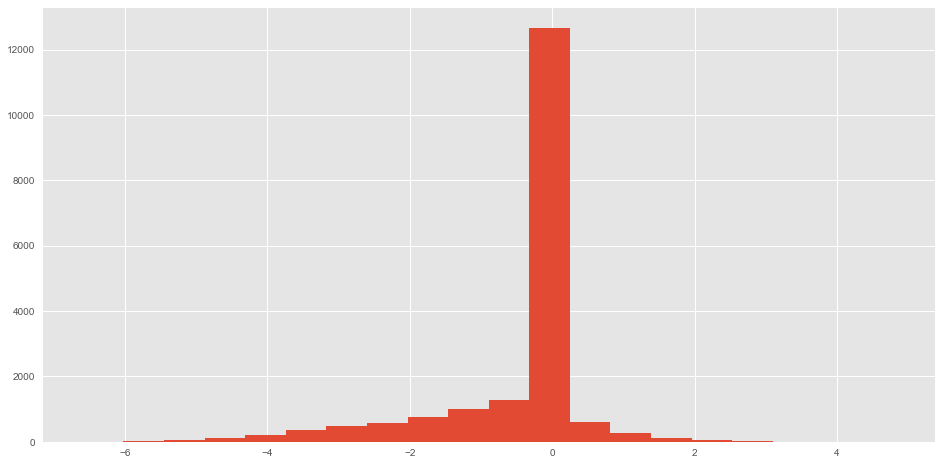

In [5]:
no_sample = 3
image = train_X[no_sample]
plt.figure(figsize=(16,8))
plt.hist(image.flatten(), bins=20)
plt.show()

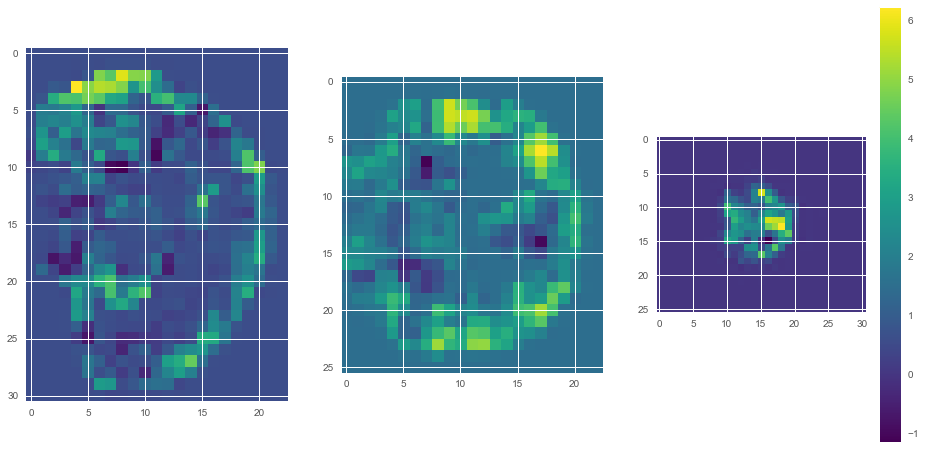

In [39]:
def plot_shape(image, dimension_0, dimension_1, dimension_2):
    
    plt.figure(figsize=(16,8))
    
    cmap = 'viridis'
    
    plt.subplot(1, 3, 1)
    plt.imshow(image[dimension_0,:,:],cmap=cmap)
    
    plt.subplot(1, 3, 2)
    plt.imshow(image[:,dimension_1,:],cmap=cmap)
    
    plt.subplot(1, 3, 3)
    plt.imshow(image[:,:,dimension_2],cmap=cmap)        
    
    plt.colorbar()
    
    plt.show()


sample_no = 100
dimension_0 = 10
dimension_1 = 12
dimension_2 = 20

image = train_X[sample_no]
plot_shape(image, dimension_0, dimension_1, dimension_2)

In [238]:
def normalized_data(images):
    normed = np.zeros(images.shape)
    for idx, image in enumerate(images):
        normed[idx] = gaussian_filter(image, sigma=1)
        np.multiply(normed[idx], (normed[idx] > np.percentile(normed[idx].flatten(), 90)))
    return normed

normalized_train_X = normalized_data(train_X)

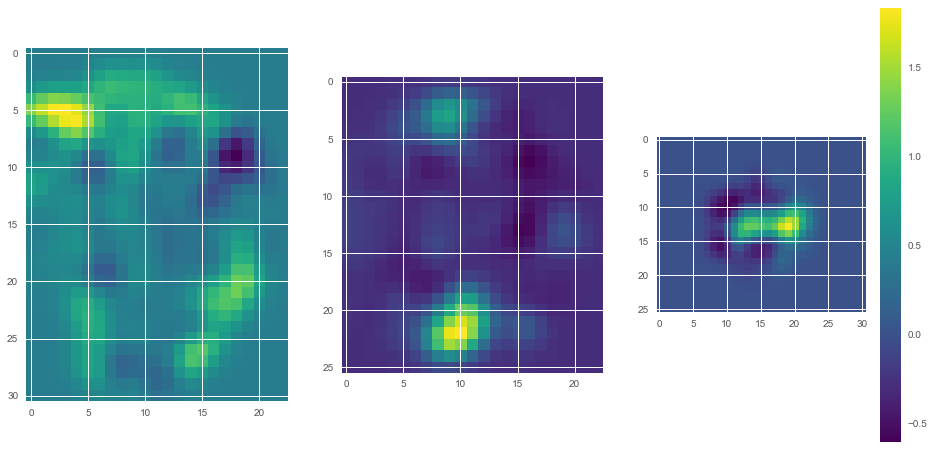

In [240]:
def plot_shape(image, dimension_0, dimension_1, dimension_2):
    
    plt.figure(figsize=(16,8))
    
    cmap = 'viridis'
    
    plt.subplot(1, 3, 1)
    plt.imshow(image[dimension_0,:,:],cmap=cmap)
    
    plt.subplot(1, 3, 2)
    plt.imshow(image[:,dimension_1,:],cmap=cmap)
    
    plt.subplot(1, 3, 3)
    plt.imshow(image[:,:,dimension_2],cmap=cmap)        
    
    plt.colorbar()
    
    plt.show()
    
sample_no = 10
dimension_0 = 10
dimension_1 = 12
dimension_2 = 20

image = normalized_train_X[sample_no]
plot_shape(image, dimension_0, dimension_1, dimension_2)

In [43]:
sample_no = 100

image = normalized_train_X[sample_no]
np.percentile(image.flatten(),90)

1.2415960138882394

(31, 23)
(26, 23)
(26, 31)


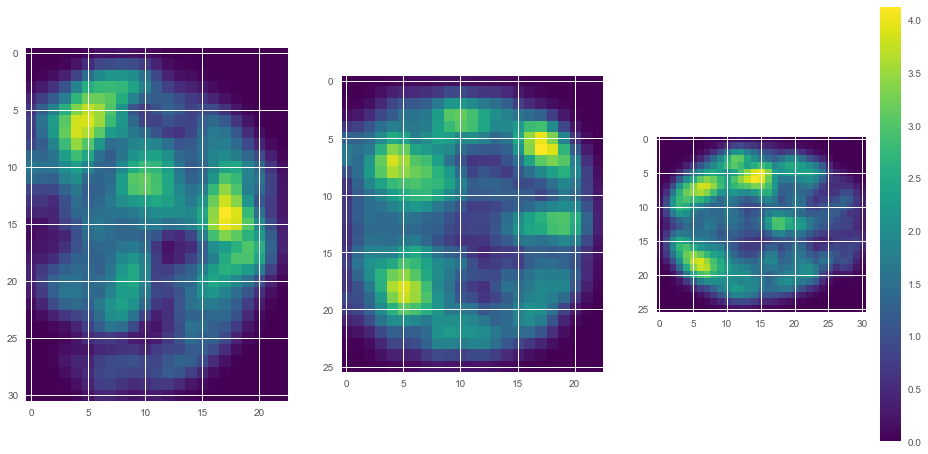

In [47]:
sample_no = 100

image = normalized_train_X[sample_no]

plt.figure(figsize=(16,8))
    
cmap = 'viridis'

plt.subplot(1, 3, 1)
plt.imshow(np.max(image, axis=0),cmap=cmap)

plt.subplot(1, 3, 2)
plt.imshow(np.max(image, axis=1),cmap=cmap)

plt.subplot(1, 3, 3)
plt.imshow(np.max(image, axis=2),cmap=cmap)        

plt.colorbar()

plt.show()

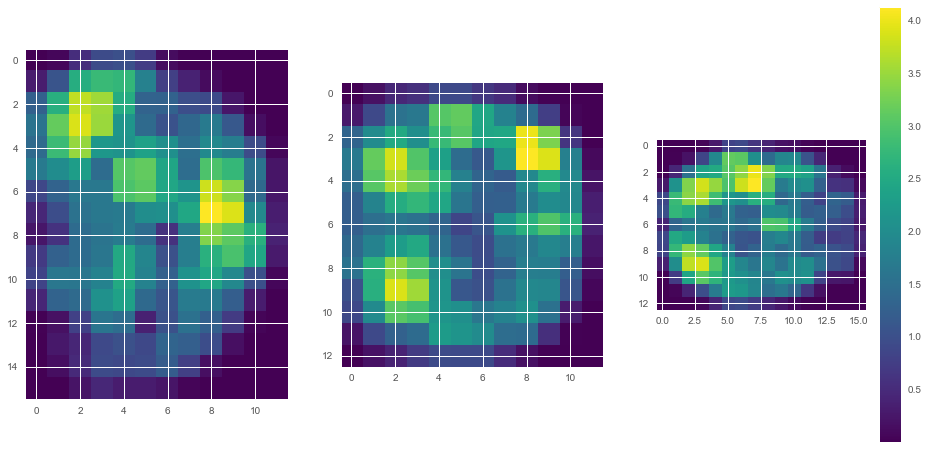

In [57]:
sample_no = 100

image = normalized_train_X[sample_no]

def process_image(image):
    image = skimage.measure.block_reduce(image, (2,2), np.max)
    return image

plt.figure(figsize=(16,8))
    
cmap = 'viridis'

plt.subplot(1, 3, 1)
plt.imshow(process_image(np.max(image, axis=0)),cmap=cmap)

plt.subplot(1, 3, 2)
plt.imshow(process_image(np.max(image, axis=1)),cmap=cmap)

plt.subplot(1, 3, 3)
plt.imshow(process_image(np.max(image, axis=2)),cmap=cmap)        

plt.colorbar()

plt.show()

In [61]:
def process_2dimage(image):
#     image = skimage.measure.block_reduce(image, (2,2), np.max)
    image = image.flatten()
    return image

def process_data(images):
    processed = []
    for image in images:
        d1 = np.max(image, axis=0)
        d2 = np.max(image, axis=1)
        d3 = np.max(image, axis=2)
        d1 = process_2dimage(d1)
        d2 = process_2dimage(d2)
        d3 = process_2dimage(d3)
        image = np.concatenate([d1, d2, d3])
        processed.append(image)
    return np.array(processed)

processed_train_X = process_data(normalized_train_X)

In [62]:
processed_train_X.shape

(4602, 2117)

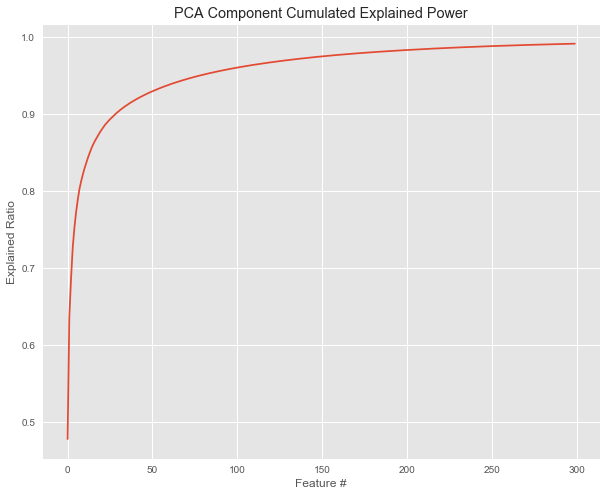

In [226]:
pca = PCA(n_components=300)
pca.fit(processed_train_X)

cumulated_explained_variance_ratio = np.zeros(len(pca.explained_variance_ratio_))
cumulated_explained_variance_ratio[0] = pca.explained_variance_ratio_[0]
for i in range(1, len(pca.explained_variance_ratio_)):
    cumulated_explained_variance_ratio[i]=cumulated_explained_variance_ratio[i-1]+pca.explained_variance_ratio_[i]
plt.figure(figsize=(10,8))
plt.plot(cumulated_explained_variance_ratio)
plt.title('PCA Component Cumulated Explained Power')
plt.xlabel('Feature #')
plt.ylabel('Explained Ratio')
plt.show()

In [189]:
reduced_train_X=pca.transform(processed_train_X)
reduced_train_X.shape

(4602, 300)

In [190]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(reduced_train_X, train_binary_Y, test_size=0.1)

In [241]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.linear_model import RidgeClassifier,LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


labe_no = 5

clf = AdaBoostClassifier()
clf.fit(X_train, Y_train[:,labe_no])

from sklearn.metrics import accuracy_score, roc_auc_score

Y_train_predict = clf.predict(X_train)
Y_test_predict = clf.predict(X_test)

train_subset = accuracy_score(Y_train[:,labe_no], Y_train_predict)
test_subset = accuracy_score(Y_test[:,labe_no], Y_test_predict)
train_auc = roc_auc_score(Y_train[:,labe_no], Y_train_predict)
test_auc = roc_auc_score(Y_test[:,labe_no], Y_test_predict)
print(train_subset, test_subset)
print(train_auc, test_auc)

0.885776382516 0.87852494577
0.787519640853 0.767224754558


In [224]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier,BaggingClassifier
from sklearn.linear_model import RidgeClassifier,LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

clfs=[]

for i in range(19):
    clf = SVC()
    clf.fit(X_train, Y_train[:, i])
    clfs.append(clf)

In [209]:
from sklearn.metrics import accuracy_score, roc_auc_score

Y_train_predict = np.zeros(Y_train.shape)
Y_test_predict = np.zeros(Y_test.shape)

for i in range(19):
    clf = clfs[i]
    Y_train_predict[:,i]=np.round(clf.predict(X_train))
    Y_test_predict[:,i]=np.round(clf.predict(X_test))
    
train_subset = accuracy_score(Y_train, Y_train_predict)
test_subset = accuracy_score(Y_test, Y_test_predict)
train_auc = roc_auc_score(Y_train, Y_train_predict)
test_auc = roc_auc_score(Y_test, Y_test_predict)
print(train_subset, test_subset)
print(train_auc, test_auc)

0.699830958706 0.44251626898
0.953032761484 0.836121278453
